In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import ast
from scipy.optimize import curve_fit

In [3]:
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['legend.facecolor'] = 'white' 

In [4]:
def sigmoid(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

In [6]:
guess_data_pre = pd.read_csv('E:/Haiyan Lab project/Probability distort/data and script/5 probability data/UDdata_evi_pre.csv')
guess_data_post = pd.read_csv('E:/Haiyan Lab project/Probability distort/data and script/5 probability data/UDdata_evi_post.csv')

In [7]:
def orignize_guess_data(guess_data):
    overall_sub_guess = np.zeros([len(guess_data['subjno'].unique()),5])
    sub_order = -1

    for sub in guess_data['subjno'].unique():
        sub_order += 1
        signle_subject_data = guess_data[guess_data.subjno == sub].sort_values(by='teststi')
        
        second_row = signle_subject_data.iloc[1:2] 
        remaining_rows = pd.concat([signle_subject_data.iloc[:1], signle_subject_data.iloc[2:]])
        signle_subject_data_df = pd.concat([remaining_rows, second_row]).reset_index(drop=True)


        signle_subject_data_df['re_response'] = np.nan
        signle_subject_data_df['re_response'][[0,2,4,6,8]] = signle_subject_data_df['test_slider.response'][[0,2,4,6,8]]
        signle_subject_data_df['re_response'][[1,3,5,7,9]] = 100 - signle_subject_data_df['test_slider.response'][[1,3,5,7,9]]


        sub_guess = []
        for i in [0,2,4,6,8]:
            if abs(signle_subject_data_df['re_response'][i] - signle_subject_data_df['answer'][i]) < abs(signle_subject_data_df['re_response'][i+1] - signle_subject_data_df['answer'][i]):
                sub_guess.append(signle_subject_data_df['re_response'][i])
            else:
                sub_guess.append(signle_subject_data_df['re_response'][i+1])
                
        sub_guess_order = []
        sub_guess_order.append(sub_guess[3])
        sub_guess_order.append(sub_guess[1])
        sub_guess_order.append(sub_guess[2])
        sub_guess_order.append(sub_guess[0])
        sub_guess_order.append(sub_guess[4])
        
        overall_sub_guess[sub_order] = sub_guess_order
        
    return overall_sub_guess

In [8]:
def individual_sub_plot(overall_sub_guess):
    for i in range(np.shape(overall_sub_guess)[0]):
        y_data = overall_sub_guess[i]
        x_data = np.array([0, 25, 50, 75, 100]) 

        initial_guess = [100, 50, 0.1]
        params, params_covariance = curve_fit(sigmoid, x_data, y_data, p0=initial_guess,maxfev=10000)
        L, x0, k = params
        x_fit = np.linspace(0, 100, 500)  
        y_fit = sigmoid(x_fit, L, x0, k)

        #plt.scatter(x_data, y_data, label="Data", color="red",alpha=0.3)
        plt.plot(x_fit, y_fit, label="Fitted Sigmoid Curve", color="yellow", alpha=0.3)
        
    y_data = overall_sub_guess.mean(axis=0)
    x_data = np.array([0, 25, 50, 75, 100])
    initial_guess = [100, 50, 0.1]
    params, params_covariance = curve_fit(sigmoid, x_data, y_data, p0=initial_guess)
    L, x0, k = params
    x_fit = np.linspace(0, 100, 500)  
    y_fit = sigmoid(x_fit, L, x0, k)

    plt.scatter(x_data, y_data, label="Data", color="red")
    plt.plot(x_fit, y_fit, label="Fitted Sigmoid Curve", color="blue")
    

In [11]:
overall_sub_guess_pre = orignize_guess_data(guess_data_pre)
overall_sub_guess_post = orignize_guess_data(guess_data_post)

C:\Users\18611\AppData\Local\Temp\ipykernel_17828\3947619979.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signle_subject_data_df['re_response'][[0,2,4,6,8]] = signle_subject_data_df['test_slider.response'][[0,2,4,6,8]]
C:\Users\18611\AppData\Local\Temp\ipykernel_17828\3947619979.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signle_subject_data_df['re_response'][[1,3,5,7,9]] = 100 - signle_subject_data_df['test_slider.response'][[1,3,5,7,9]]
C:\Users\18611\AppData\Local\Temp\ipykernel_17828\3947619979.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

Text(0.5, 1.0, 'Probability distortion with evidence')

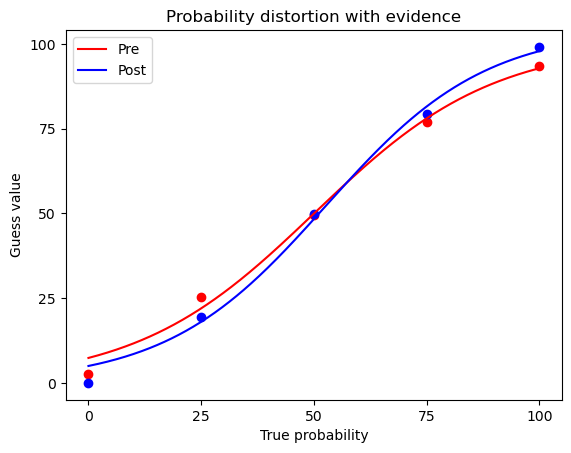

In [12]:
x_data = np.array([0, 25, 50, 75, 100])
y_data_pre = overall_sub_guess_pre.mean(axis=0)
y_data_post = overall_sub_guess_post.mean(axis=0)

initial_guess = [100, 50, 0.1]
params_pre, params_covariance_pre = curve_fit(sigmoid, x_data, y_data_pre, p0=initial_guess)
L_pre, x0_pre, k_pre = params_pre
x_fit_pre = np.linspace(0, 100, 500)
y_fit_pre = sigmoid(x_fit_pre, L_pre, x0_pre, k_pre)
plt.scatter(x_data, y_data_pre,  color="red")
plt.plot(x_fit_pre, y_fit_pre, label="Pre", color="red")

params_post, params_covariance_post = curve_fit(sigmoid, x_data, y_data_post, p0=initial_guess)
L_post, x0_post, k_post = params_post
x_fit_post = np.linspace(0, 100, 500)
y_fit_post = sigmoid(x_fit_post, L_post, x0_post, k_post)
plt.scatter(x_data, y_data_post, color="blue")
plt.plot(x_fit_post, y_fit_post, label="Post", color="blue")

plt.legend()
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 25, 50, 75, 100])
plt.xlabel('True probability')
plt.ylabel('Guess value')
plt.title('Probability distortion with evidence')